In [3]:
    import matplotlib.pyplot as plt
    import csv
    import numpy as np
    %matplotlib inline

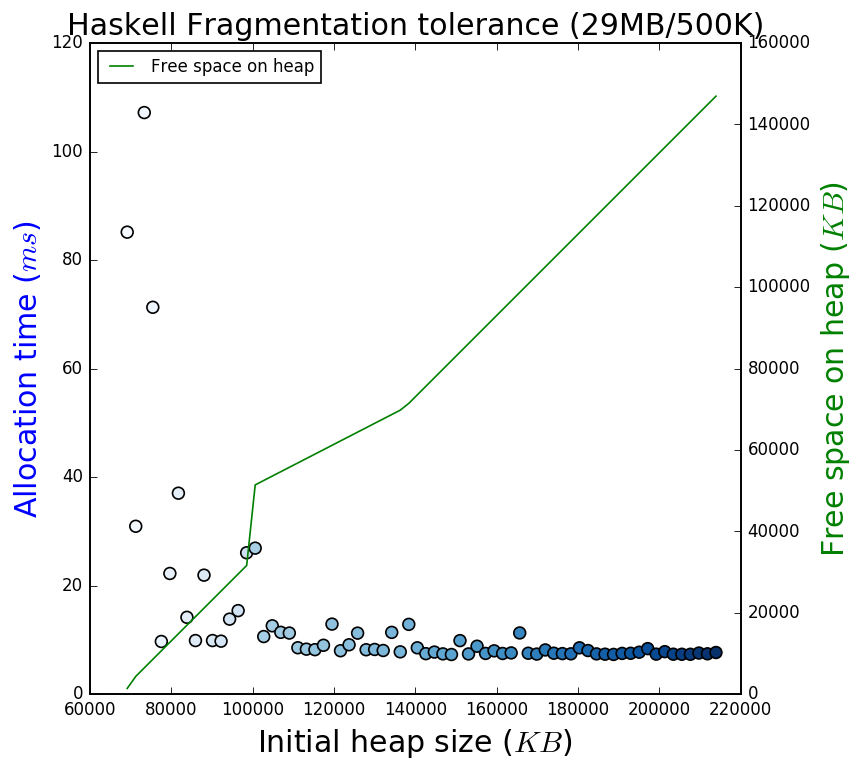

In [7]:
heap, time , free = np.loadtxt('hskfrag.txt', delimiter=',', unpack=True)

heap = [h/1000 for h in heap]
free = [float(f/1000) for f in free]
fig,ax1 = plt.subplots(dpi=120, figsize=(7,7))
ax2 = plt.twinx()

ax1.set_ylabel("Allocation time ($ms$)",color = 'blue',fontsize=18)
ax1.set_xlabel("Initial heap size ($KB$)",fontsize=18)

ax2.set_ylabel("Free space on heap ($KB$)",color = 'green',fontsize=18)
ax2.set_xlabel("Initial heap size ($KB$)",fontsize=18)

p1 = ax1.scatter(heap,time,c =free,s=50,cmap='Blues',label = 'Time to allocate large array')
p2,= ax2.plot(heap,free , label='Free space on heap' ,color = 'green')


plt.title('Haskell Fragmentation tolerance (29MB/500K)',fontsize=18)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

#plt.fill([30000,42000,42000,30000],[0,0,20000,20000],'b',alpha=0.05)

lines =[p2]

plt.legend(lines,[l.get_label() for l in lines],prop = fontP ,loc =2)

name = "hskgraph.png"

plt.savefig(name)


plt.show()
